In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


| Название столбца |Описание|
|:----------------:|:--------|
| L1 | Родной язык участника |
| C | Страна происхождения |
| L1L2 | Лингвистическое сходство между родным языком и языком изучения **(???)** |
| L2 | Второй язык (иностранный) |
| AaA | Возраст переезда в Нидерланды |
| LoR | Продолжительность проживания в Нидерландах |
| Edu.day | Дни формального обучения изучаемого языка |
| Sex | Пол |
| Family | Языкова семья |
| ISO639.3 | ISO 639-3 код изучаемого языка |
| Enroll | Продолжительность обучения на языковых курсах |
| Speaking | Результат теста на знание разговорного языка на государственном экзамене по голландскому языку как второму |
| morph | Морфологическая оценка, связанная со структурами знаний внутри слов |
| lex | Оценка словарного запаса, указывающая на понимание написанных слов |
| new_feat | Оценка характеристик, отражающая способность усваивать новые звуки/грамматические структуры |
| new_sounds | Оценка произношения звуковых символов |

In [3]:
dataframe = pd.read_csv('stex.csv', encoding='latin1')
dataframe.head()

,L1,C,L1L2,L2,AaA,LoR,Edu.day,Sex,Family,ISO639.3,Enroll,Speaking,morph,lex,new_feat,new_sounds
0,Afrikaans,SouthAfrica,AfrikaansEnglish,English,25,0,4.0,Female,Indo-European,afr,93,496,NaN,0.010463,NaN,NaN
1,Afrikaans,SouthAfrica,AfrikaansGerman,German,47,2,4.0,Male,Indo-European,afr,93,542,NaN,0.010463,NaN,NaN
2,Afrikaans,SouthAfrica,AfrikaansMonolingual,Monolingual,23,23,3.0,Female,Indo-European,afr,93,585,NaN,0.010463,NaN,NaN
3,Afrikaans,SouthAfrica,AfrikaansMonolingual,Monolingual,42,2,2.0,Female,Indo-European,afr,93,521,NaN,0.010463,NaN,NaN
4,Afrikaans,SouthAfrica,AfrikaansMonolingual,Monolingual,22,19,3.0,Female,Indo-European,afr,93,639,NaN,0.010463,NaN,NaN


In [4]:
print(dataframe[dataframe.C == 'SouthAfrica'].L1.unique())
print(dataframe[dataframe.C == 'SouthAfrica'].L1.unique().size)

['Afrikaans' 'English' 'French' 'German' 'Greek' 'Italian' 'Portugese'
 'Somali' 'Spanish']
9


In [5]:
dataframe.L2.unique()

array(['English', 'German', 'Monolingual', 'Russian', 'French',
       'Afrikaans', 'Dutch', 'Croatian', 'Greek', 'Italian', 'Serbian',
       'Turkish', 'Albanian', 'Portugese', 'Spanish', 'Arabic', 'Persian',
       'Tamazight', 'Kurdish', 'Armenian', 'Pashto', 'Romanian', 'Danish',
       'Polish', 'Hebrew', 'Czech', 'Swedish', 'Norwegian', 'Slovak',
       'Catalan', 'Bulgarian', 'Romansch', 'Hindi', 'Malay', 'Chinese',
       'Indonesian', 'Japanese', 'Hungarian', 'Georgian', 'Swahili',
       'Finnish', 'Ukranian', 'Urdu', 'Azerbaijani'], dtype=object)

In [6]:
dataframe.groupby('L2').agg(Count=('L2', 'count')).sort_values(by='Count', ascending=False)

,Count
L2,
English,27886
Monolingual,8748
French,4804
German,2003
Russian,1889
Arabic,1315
Spanish,725
Persian,396
Italian,348


In [7]:
dataframe.count()

L1            50235
C             50235
L1L2          50235
L2            50235
AaA           50235
LoR           50235
Edu.day       50226
Sex           50235
Family        50235
ISO639.3      50235
Enroll        50235
Speaking      50235
morph         48426
lex           50235
new_feat      48219
new_sounds    48219
dtype: int64

In [8]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50235 entries, 0 to 50234
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   L1          50235 non-null  object 
 1   C           50235 non-null  object 
 2   L1L2        50235 non-null  object 
 3   L2          50235 non-null  object 
 4   AaA         50235 non-null  int64  
 5   LoR         50235 non-null  int64  
 6   Edu.day     50226 non-null  float64
 7   Sex         50235 non-null  object 
 8   Family      50235 non-null  object 
 9   ISO639.3    50235 non-null  object 
 10  Enroll      50235 non-null  int64  
 11  Speaking    50235 non-null  int64  
 12  morph       48426 non-null  float64
 13  lex         50235 non-null  float64
 14  new_feat    48219 non-null  float64
 15  new_sounds  48219 non-null  float64
dtypes: float64(5), int64(4), object(7)
memory usage: 6.1+ MB


In [9]:
dataframe.describe()

,AaA,LoR,Edu.day,Enroll,Speaking,morph,lex,new_feat,new_sounds
count,50235.000000,50235.000000,50226.000000,50235.000000,50235.000000,48426.000000,50235.000000,48219.000000,48219.000000
mean,26.487648,3.923002,3.134213,81.147029,517.622275,0.050150,0.411063,14.468073,20.117049
std,7.245634,4.275746,0.855379,25.346411,37.917385,0.056546,0.189779,5.645576,3.602436
min,0.000000,0.000000,1.000000,8.000000,270.000000,-0.017100,0.010463,6.000000,13.000000
25%,22.000000,2.000000,3.000000,67.000000,494.000000,0.018300,0.388004,11.000000,19.000000
50%,26.000000,3.000000,3.000000,86.000000,516.000000,0.047900,0.398649,14.000000,21.000000
75%,30.000000,5.000000,4.000000,100.000000,540.000000,0.063800,0.595079,21.000000,23.000000
max,88.000000,59.000000,4.000000,148.000000,685.000000,0.326900,0.595079,32.000000,27.000000


Если участники не были оценены по способности усваивать новые звуки, они также не были оценены по произношению, но они были оценены по разговорной речи, что должно быть связано с обоими этими показателями. Удалим те строки, где есть NaN по критериям оценки усвоения новых звуков или произношению.

In [10]:
dataframe.dropna(inplace=True)

In [11]:
print(dataframe[dataframe.C == 'SouthAfrica'].L1.unique())
print(dataframe[dataframe.C == 'SouthAfrica'].L1.unique().size)

['English' 'French' 'German' 'Greek' 'Italian' 'Portugese' 'Somali'
 'Spanish']
8


In [12]:
dataframe.count()

L1            47232
C             47232
L1L2          47232
L2            47232
AaA           47232
LoR           47232
Edu.day       47232
Sex           47232
Family        47232
ISO639.3      47232
Enroll        47232
Speaking      47232
morph         47232
lex           47232
new_feat      47232
new_sounds    47232
dtype: int64

### Гипотеза №1

Соседние страны из той же языковой семьи наберут больше баллов (покажут лучший результат), так как они ближе по культуре и языку.

In [13]:
dataframe.C.unique()

array(['Albania', 'Yugoslavia', 'France', 'USSR', 'Australia',
       'Czechslowakia', 'UnitedKingdom', 'Turkey', 'Ethiopia', 'Syria',
       'Afghanistan', 'Ghana', 'Egypt', 'Eritrea', 'Sudan', 'Iran',
       'Algeria', 'Lebanon', 'Iraq', 'Morocco', 'Netherlands', 'Libya',
       'UnitedStates', 'Israel', 'Kuwait', 'Tunisia', 'SaudiArabia',
       'Greece', 'Belgium', 'Germany', 'Togo', 'Spain', 'India', 'Rwanda',
       'Aruba', 'Iceland', 'Switzerland', 'ElSalvador', 'Somalia',
       'Tanzania', 'Russia', 'Mozambique', 'China', 'Sweden',
       'Azerbaijan', 'Armenia', 'Georgia', 'Ukraine', 'Argentina',
       'BosniaandHerzegovina', 'SerbiaandMontenegro', 'Slovenia',
       'Bulgaria', 'Norway', 'Denmark', 'Belarus', 'Finland', 'Croatia',
       'Romania', 'Austria', 'CzechRepublic', 'Indonesia', 'Slovakia',
       'Philippines', 'Chile', 'Japan', 'NewZealand', 'Guyana', 'Canada',
       'SouthAfrica', 'Cuba', 'Italy', 'Zimbabwe', 'Kenya', 'HongKong',
       'Malaysia', 'Bolivia',

Заметим, что есть несколько стран, которые уже не существуют. Причем некоторые из них включали в себя несколько этносов, языков и пр. Например, СССР, Югославия. Такие строки датасета могут только путать наше представление о факторах, влияющих на изучение языка. Дальше рассмотрим, как именно это влияет.

In [14]:
country_rating = dataframe.groupby("C").agg(Median=('Speaking', 'median'), Count=('Speaking', 'count'))
country_rating[country_rating.Count > 20].sort_values("Median",ascending=False).head(20)

,Median,Count
C,,
Austria,563.0,252
Switzerland,559.0,258
Norway,550.0,196
Germany,550.0,4863
Sweden,547.0,292
SouthAfrica,539.0,204
Czechslowakia,538.0,410
Finland,536.5,264
Hungary,536.0,626


Здесь стоит фильтр по количеству от 20 человек из каждой страны, чтобы выборка была более-менее показательной.

Как мы видим, лучшие результаты тестов по разговорной речи получают люди из европейских стран. Однако есть и такие регионы как Южная Африка.

In [15]:
# only South Africa
SA_langs = dataframe[dataframe.C == "SouthAfrica"]
SA_langs.L1.unique()

array(['English', 'French', 'German', 'Greek', 'Italian', 'Portugese',
       'Somali', 'Spanish'], dtype=object)

In [16]:
print(SA_langs.groupby("L1").agg(Count=('L1', 'count')))
print('===============================================')
print(SA_langs.groupby("L2").agg(Count=('L2', 'count')))

           Count
L1              
English      193
French         1
German         2
Greek          2
Italian        1
Portugese      2
Somali         2
Spanish        1
             Count
L2                
Afrikaans      116
English         11
French          11
German          10
Japanese         1
Monolingual     53
Portugese        1
Spanish          1


Теперь мы видим, что основной язык в Южной Африке - это английский. Английский  и голландскимй входят не только в одну семью (Индоевропейскую), но и в одну группу (германские языки).

In [17]:
uruguay = dataframe[dataframe.C == "Uruguay"]
uruguay

,L1,C,L1L2,L2,AaA,LoR,Edu.day,Sex,Family,ISO639.3,Enroll,Speaking,morph,lex,new_feat,new_sounds
42175,Spanish,Uruguay,SpanishMonolingual,Monolingual,26,6,3.0,Female,Indo-European,spa,101,500,0.0193,0.398649,18.0,23.0
42243,Spanish,Uruguay,SpanishEnglish,English,30,2,4.0,Female,Indo-European,spa,101,527,0.0193,0.398649,18.0,23.0
42251,Spanish,Uruguay,SpanishEnglish,English,30,2,4.0,Female,Indo-European,spa,101,509,0.0193,0.398649,18.0,23.0
42403,Spanish,Uruguay,SpanishEnglish,English,26,4,3.0,Female,Indo-European,spa,101,536,0.0193,0.398649,18.0,23.0
42490,Spanish,Uruguay,SpanishEnglish,English,25,1,4.0,Female,Indo-European,spa,101,582,0.0193,0.398649,18.0,23.0
42520,Spanish,Uruguay,SpanishMonolingual,Monolingual,25,1,4.0,Female,Indo-European,spa,101,556,0.0193,0.398649,18.0,23.0
42597,Spanish,Uruguay,SpanishEnglish,English,22,0,3.0,Female,Indo-European,spa,101,597,0.0193,0.398649,18.0,23.0
42620,Spanish,Uruguay,SpanishEnglish,English,42,4,4.0,Female,Indo-European,spa,101,595,0.0193,0.398649,18.0,23.0
42621,Spanish,Uruguay,SpanishEnglish,English,33,8,3.0,Female,Indo-European,spa,101,546,0.0193,0.398649,18.0,23.0
42732,Spanish,Uruguay,SpanishEnglish,English,24,4,2.0,Female,Indo-European,spa,101,554,0.0193,0.398649,18.0,23.0


In [18]:
print(uruguay.groupby("L1").agg(Count=('L1', 'count')))
print('===============================================')
print(uruguay.groupby("L2").agg(Count=('L2', 'count')))

         Count
L1            
Spanish     33
             Count
L2                
English         23
French           3
Italian          1
Monolingual      3
Portugese        2
Swedish          1


Снова казалось бы далекая страна показывает неплохие результаты (топ-17), так как много участников, владеющих английским языком.

In [19]:
fam_rating = dataframe.groupby("Family").agg(Median=('Speaking', 'median'), Count=('Speaking', 'count'))
fam_rating[fam_rating.Count > 100].sort_values("Median",ascending=False).head(10)

,Median,Count
Family,,
Uralic,535.0,1032
Indo-European,523.0,32955
Kartvelian,506.0,117
Altaic,501.0,2912
Austronesian,501.0,1819
Japanese,500.0,278
Afro-Asiatic,498.0,7150
Niger-Congo,496.0,430
Austro-Asiatic,491.5,182


Интересно, что уральская языковая семья по медиане получает высшую оценку, чем индо-европейская. Рассмотрим подробнее этот момент.

In [20]:
dataframe[dataframe["Family"] == "Uralic"].groupby(["L1", "L2"]).count()

C  L1L2  AaA  LoR  Edu.day  Sex  Family  ISO639.3  \
L1        L2                                                                 
Finnish   English      215   215  215  215      215  215     215       215   
          German         3     3    3    3        3    3       3         3   
          Monolingual    3     3    3    3        3    3       3         3   
          Russian        2     2    2    2        2    2       2         2   
          Swedish       15    15   15   15       15   15      15        15   
Hungarian Arabic         1     1    1    1        1    1       1         1   
          Croatian       1     1    1    1        1    1       1         1   
          Dutch          2     2    2    2        2    2       2         2   
          English      493   493  493  493      493  493     493       493   
          French         8     8    8    8        8    8       8         8   
          German       139   139  139  139      139  139     139       139   
          Hebrew         1     1    1    1        1    1       1         1   
          Hungarian      2     2    2    2        2    2       2         2   
          Italian        8     8    8    8        8    8       8         8   
          Monolingual   50    50   50   50       50   50      50        50   
          Norwegian      2     2    2    2        2    2       2         2   
          Polish         1     1    1    1        1    1       1         1   
          Romanian      55    55   55   55       55   55      55        55   
          Romansch       2     2    2    2        2    2       2         2   
          Russian        9     9    9    9        9    9       9         9   
          Serbian        4     4    4    4        4    4       4         4   
          Slovak        15    15   15   15       15   15      15        15   
          Spanish        1     1    1    1        1    1       1         1   

                       Enroll  Speaking  morph  lex  new_feat  new_sounds  
L1        L2                                                               
Finnish   English         215       215    215  215       215         215  
          German            3         3      3    3         3           3  
          Monolingual       3         3      3    3         3           3  
          Russian           2         2      2    2         2           2  
          Swedish          15        15     15   15        15          15  
Hungarian Arabic            1         1      1    1         1           1  
          Croatian          1         1      1    1         1           1  
          Dutch             2         2      2    2         2           2  
          English         493       493    493  493       493         493  
          French            8         8      8    8         8           8  
          German          139       139    139  139       139         139  
          Hebrew            1         1      1    1         1           1  
          Hungarian         2         2      2    2         2           2  
          Italian           8         8      8    8         8           8  
          Monolingual      50        50     50   50        50          50  
          Norwegian         2         2      2    2         2           2  
          Polish            1         1      1    1         1           1  
          Romanian         55        55     55   55        55          55  
          Romansch          2         2      2    2         2           2  
          Russian           9         9      9    9         9           9  
          Serbian           4         4      4    4         4           4  
          Slovak           15        15     15   15        15          15  
          Spanish           1         1      1    1         1           1

Как оказалось, большинство участников из этого среза владеют английским или немецким, которые тесно связаны (и похожи) в голландским.

### Вывод по гипотезе №1

Гипотеза подтверждена, в топе по уровню разговорного голландского действительно те участники, которые либо жили в соседних европейских странах со схожим языком, либо те, которые знали английский/немецкий как иностранный.

### Гипотеза №2

Люди, владеющие лишь одним языком, показывают худший результат, чем люди, которые знают хотя бы один язык как иностранный (второй).

In [21]:
monoling = dataframe[dataframe.L2 == 'Monolingual']
print('Владеющие только одним языком')
print('\tМедиана:')
print(monoling.median(numeric_only=True))
print('\n\tСреднее:')
print(monoling.mean(numeric_only=True))
print('\n\nВладеющие несколькими языками')
print('\tМедиана:')
print(dataframe[dataframe.L2 != 'Monolingual'].median(numeric_only=True))
print('\n\tСреднее:')
print(dataframe[dataframe.L2 != 'Monolingual'].mean(numeric_only=True))

Владеющие только одним языком
	Медиана:
AaA            25.000000
LoR             3.000000
Edu.day         3.000000
Enroll         85.000000
Speaking      510.000000
morph           0.050000
lex             0.398649
new_feat       11.000000
new_sounds     20.000000
dtype: float64

	Среднее:
AaA            26.242613
LoR             5.041510
Edu.day         2.940197
Enroll         84.258560
Speaking      510.318949
morph           0.044092
lex             0.395435
new_feat       13.388133
new_sounds     20.101431
dtype: float64


Владеющие несколькими языками
	Медиана:
AaA            26.000000
LoR             2.000000
Edu.day         3.000000
Enroll         88.000000
Speaking      518.000000
morph           0.047900
lex             0.398649
new_feat       14.000000
new_sounds     21.000000
dtype: float64

	Среднее:
AaA            26.555627
LoR             3.668587
Edu.day         3.181247
Enroll         80.917786
Speaking      519.381640
morph           0.046007
lex             0.411474
n

В целом гипотеза подтверждается, однако разрыв получается меньше ожидаемого, всего несколько баллов.

In [22]:
monoling.groupby("L1").agg(Median=('Speaking', 'median'), Count=('Speaking', 'count')).sort_values("Median",ascending=False).head(10)

,Median,Count
L1,,
Swedish,562.0,3
German,546.0,447
Tamil,543.0,1
Tamazight,542.0,27
Byelorussian,540.5,2
Czech,540.5,32
Finnish,535.0,3
English,530.0,1636
Bosnian,522.0,26


Снова видим, что лучшие результаты у европейских языков.

### Женщины или мужчины?

In [23]:
dataframe.groupby("Sex").median(numeric_only=True)

,AaA,LoR,Edu.day,Enroll,Speaking,morph,lex,new_feat,new_sounds
Sex,,,,,,,,,
Female,26.0,2.0,3.0,90.0,522.0,0.0468,0.396083,12.0,20.0
Male,26.0,3.0,3.0,79.0,504.0,0.0586,0.555295,18.0,21.0


Согласно этому датасету мужчины лучше усваивают новые слова, грамматические структуры и прочее. Но при этом женщины лучше справляются с разговорным голландским.

### Гипотеза №3

Молодые люди в большей степени способны освоить новый язык, чем старшие.

In [24]:
dataframe["AgeR"] = pd.cut(dataframe["AaA"], 5)
dataframe.groupby("AgeR").median(numeric_only=True).sort_values("Speaking", ascending=False)

C:\Users\misha\AppData\Local\Temp\ipykernel_6368\2244237504.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dataframe.groupby("AgeR").median(numeric_only=True).sort_values("Speaking", ascending=False)


,AaA,LoR,Edu.day,Enroll,Speaking,morph,lex,new_feat,new_sounds
AgeR,,,,,,,,,
"(-0.088, 17.6]",15.0,6.0,3.0,84.0,526.0,0.0500,0.425700,12.0,20.0
"(70.4, 88.0]",85.0,9.0,2.5,81.0,519.0,0.0444,0.475689,16.5,20.5
"(17.6, 35.2]",25.0,2.0,3.0,86.0,517.0,0.0479,0.398649,14.0,21.0
"(52.8, 70.4]",55.0,2.0,4.0,100.0,514.0,0.0128,0.363589,11.0,19.0
"(35.2, 52.8]",39.0,3.0,4.0,90.0,506.0,0.0468,0.396083,12.0,21.0


In [25]:
dataframe["AgeR"] = pd.cut(dataframe["AaA"], 5)
dataframe.groupby("AgeR").mean(numeric_only=True).sort_values("Speaking", ascending=False).round(2)

C:\Users\misha\AppData\Local\Temp\ipykernel_6368\1312060536.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dataframe.groupby("AgeR").mean(numeric_only=True).sort_values("Speaking", ascending=False).round(2)


,AaA,LoR,Edu.day,Enroll,Speaking,morph,lex,new_feat,new_sounds
AgeR,,,,,,,,,
"(-0.088, 17.6]",13.20,8.88,2.51,76.53,526.69,0.04,0.41,13.39,19.43
"(70.4, 88.0]",82.25,9.50,2.25,68.75,520.75,0.04,0.41,16.25,20.50
"(17.6, 35.2]",25.71,3.59,3.16,81.83,518.38,0.05,0.41,14.46,20.16
"(52.8, 70.4]",56.36,2.60,3.21,87.52,508.98,0.03,0.27,11.97,18.26
"(35.2, 52.8]",40.12,3.61,3.34,81.86,507.46,0.04,0.38,14.25,19.97


Результаты оказались неочевидными. Мы ожидали обратную зависимость результатов. Однако лучшие результаты оказались у детей и пожилых людей, а худшие - у людей от 35 до 70 лет. Здесь можно предположить, что дети и пожилые могут больше времени уделять обучению. Но если мы обратим внимание на столбец `Edu.day`, то увидим, что люди среднего возраста в среднем больше дней тратили на изучение языка. Из косвенных факторов, негативно влияющих на изучение языка людьми среднего возраста, можно также назвать большее количества стресса (на работе, в семье и пр.), чем у детей и пожилых людей, но это лишь предположение о причинах такого результата.

Итого, гипотеза не подтверждена.

### Гипотеза № 4

Чем больше продолжительность пребывания в стране, тем меньше времени тратится на обучение, а результаты лучше, так как опыт взаимодействия с языком в естественных условиях (в окружении) набирается достаточно большой.

In [26]:
dataframe["LoRR"] = pd.cut(dataframe["LoR"], 10)
dataframe.groupby("LoRR").median(numeric_only=True)

C:\Users\misha\AppData\Local\Temp\ipykernel_6368\1641722394.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dataframe.groupby("LoRR").median(numeric_only=True)


,AaA,LoR,Edu.day,Enroll,Speaking,morph,lex,new_feat,new_sounds
LoRR,,,,,,,,,
"(-0.059, 5.9]",26.0,2.0,3.0,90.0,516.0,0.04790,0.398649,13.0,20.0
"(5.9, 11.8]",26.0,7.0,3.0,84.0,517.0,0.05000,0.413650,14.0,21.0
"(11.8, 17.7]",24.0,14.0,3.0,82.0,521.0,0.05000,0.497357,12.0,20.0
"(17.7, 23.6]",22.0,20.0,3.0,79.0,529.0,0.05000,0.595079,12.0,20.0
"(23.6, 29.5]",18.0,26.0,3.0,79.0,531.0,0.05000,0.595079,12.0,20.0
"(29.5, 35.4]",11.0,31.0,3.0,79.0,525.5,0.05000,0.595079,12.5,20.0
"(35.4, 41.3]",0.0,38.0,3.0,70.5,503.0,0.05945,0.595079,17.0,21.0
"(41.3, 47.2]",0.0,45.5,3.5,63.0,502.5,0.06130,0.575187,15.0,20.5
"(47.2, 53.1]",9.5,51.5,3.0,70.5,506.5,0.10320,0.575187,18.5,20.0


In [27]:
dataframe.groupby("LoRR").mean(numeric_only=True).round(2)

C:\Users\misha\AppData\Local\Temp\ipykernel_6368\859424672.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dataframe.groupby("LoRR").mean(numeric_only=True).round(2)


,AaA,LoR,Edu.day,Enroll,Speaking,morph,lex,new_feat,new_sounds
LoRR,,,,,,,,,
"(-0.059, 5.9]",26.92,2.34,3.17,82.18,517.15,0.04,0.40,14.30,20.06
"(5.9, 11.8]",26.15,7.82,3.03,77.86,518.30,0.05,0.42,14.86,20.25
"(11.8, 17.7]",23.54,13.86,2.93,80.81,522.99,0.05,0.42,14.05,19.89
"(17.7, 23.6]",19.52,19.93,2.83,83.53,529.29,0.05,0.45,13.90,20.21
"(23.6, 29.5]",16.46,26.09,2.80,79.07,532.78,0.05,0.46,14.15,20.67
"(29.5, 35.4]",11.36,31.59,2.73,78.19,528.34,0.05,0.45,14.59,20.63
"(35.4, 41.3]",2.21,37.88,2.88,62.50,508.15,0.06,0.49,15.41,20.59
"(41.3, 47.2]",0.00,45.08,3.33,62.17,505.00,0.05,0.48,15.42,20.17
"(47.2, 53.1]",9.50,51.50,3.00,70.50,506.50,0.10,0.58,18.50,20.00


Как мы видим, `Enroll`, то есть продолжительность обучения на языковых курсах, действительно уменьшается. Но результат `Speaking` с какого-то момента начинает уменьшаться. Также увеличивается `new_feat` (показатель усвоения новых слов и грамматических структур). Это связано с тем, что большой опыт взаимодействия с языком позволяет быстро и легко распознавать его особенности, что помогает усваивать новые слова и конструкции.

### Гипотеза №5

Чем больше дней обучения в неделю, тем больше знаний человек получает. Однако сразу можно сказать, что это совсем необязательно. Давайте это выясним.

In [28]:
print('\tМедиана:')
print(dataframe.groupby("Edu.day").median(numeric_only=True))
print('\n\n\tСреднее:')
print(dataframe.groupby("Edu.day").mean(numeric_only=True).round(3))

	Медиана:
          AaA  LoR  Enroll  Speaking   morph       lex  new_feat  new_sounds
Edu.day                                                                     
1.0      25.0  3.0    85.0     510.0  0.0479  0.411091      14.0        21.0
2.0      22.0  3.0    85.0     519.0  0.0479  0.413650      14.0        20.0
3.0      24.0  3.0    86.0     517.0  0.0479  0.398649      12.0        20.0
4.0      28.0  2.0    86.0     516.0  0.0479  0.398649      14.0        21.0


	Среднее:
            AaA    LoR  Enroll  Speaking  morph    lex  new_feat  new_sounds
Edu.day                                                                     
1.0      25.699  4.629  78.965   510.594  0.043  0.412    14.631      20.072
2.0      23.644  5.055  78.179   520.481  0.046  0.422    14.514      20.028
3.0      24.923  3.924  82.467   518.235  0.046  0.405    13.925      19.909
4.0      29.324  3.531  81.467   518.083  0.046  0.410    14.857      20.346


Все-таки реальной зависимости здесь действительно нет. Единственное, что можно отметить, это то, что занятия один раз в неделю дают заметно более плохой результат. В остальном же ничего интересного.

## Корреляция данных

Перед тем, как искать некоторую корреляцию данных, удалим ненужные столбцы. Удалим `L1L2`, так как это всего лишь конкатенация столбцов `L1` и `L2` и в анализе не используется. Также удалим столбец с ISO-кодом языка, так как это просто другая запись `L1`.

In [29]:
dataframe.drop(["L1L2", "ISO639.3", "AgeR", "LoRR"], inplace=True, axis=1)

In [30]:
dataframe.head(10)

,L1,C,L2,AaA,LoR,Edu.day,Sex,Family,Enroll,Speaking,morph,lex,new_feat,new_sounds
301,Albanian,Albania,English,17,3,3.0,Male,Indo-European,78,515,0.0412,0.595079,11.0,21.0
302,Albanian,Albania,German,23,1,4.0,Female,Indo-European,78,521,0.0412,0.595079,11.0,21.0
303,Albanian,Yugoslavia,Croatian,22,3,3.0,Female,Indo-European,85,519,0.0412,0.595079,11.0,21.0
304,Albanian,Albania,English,30,3,4.0,Female,Indo-European,78,528,0.0412,0.595079,11.0,21.0
305,Albanian,Albania,Greek,17,1,1.0,Female,Indo-European,78,481,0.0412,0.595079,11.0,21.0
306,Albanian,Yugoslavia,French,26,4,2.0,Female,Indo-European,85,515,0.0412,0.595079,11.0,21.0
307,Albanian,Yugoslavia,English,20,6,3.0,Male,Indo-European,85,581,0.0412,0.595079,11.0,21.0
308,Albanian,Yugoslavia,Croatian,22,4,3.0,Male,Indo-European,85,471,0.0412,0.595079,11.0,21.0
309,Albanian,Yugoslavia,English,22,2,3.0,Male,Indo-European,85,601,0.0412,0.595079,11.0,21.0
310,Albanian,Yugoslavia,English,23,4,4.0,Female,Indo-European,85,486,0.0412,0.595079,11.0,21.0


Предобработаем данные, предоставляя категориальным объектам метки.

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
label = LabelEncoder()
for i in dataframe.select_dtypes("object").columns:
    dataframe[i] = label.fit_transform(dataframe[i])
print(dataframe)

       L1    C  L2  AaA  LoR  Edu.day  Sex  Family  Enroll  Speaking   morph  \
301     0    1  12   17    3      3.0    1       5      78       515  0.0412   
302     0    1  16   23    1      4.0    0       5      78       521  0.0412   
303     0  117   8   22    3      3.0    0       5      85       519  0.0412   
304     0    1  12   30    3      4.0    0       5      78       528  0.0412   
305     0    1  17   17    1      1.0    0       5      78       481  0.0412   
...    ..  ...  ..  ...  ...      ...  ...     ...     ...       ...     ...   
50230  52   79  12   29    8      3.0    1       9      35       514  0.2162   
50231  52   79  12   28    2      4.0    0       9      35       505  0.2162   
50232  52   79  12   27   12      3.0    0       9      35       502  0.2162   
50233  52   79  12   26    2      3.0    1       9      35       426  0.2162   
50234  52   79  12   26   12      3.0    1       9      35       531  0.2162   

            lex  new_feat  new_sounds  

### Анализ данных

Рассмотрим для начала асимметрию и эксцесс, чтобы посмотреть, насколько данные соответствуют нормальному распределению.

In [33]:
skewness = dataframe.skew()
kurtosis = dataframe.kurt()
print(skewness)
print(kurtosis)

L1           -0.102794
C            -0.271614
L2            1.089579
AaA           0.447003
LoR           3.255881
Edu.day      -1.016871
Sex           0.680615
Family       -0.209853
Enroll       -0.951889
Speaking      0.096934
morph         2.059030
lex          -0.881500
new_feat      0.059480
new_sounds   -0.653827
dtype: float64
L1            -1.331659
C             -0.935957
L2             0.579480
AaA            1.972488
LoR           15.793129
Edu.day        0.661007
Sex           -1.536828
Family         0.991324
Enroll         0.538157
Speaking       1.267043
morph          7.971057
lex           -0.384651
new_feat      -1.313949
new_sounds    -0.425881
dtype: float64


In [34]:
import seaborn as sns

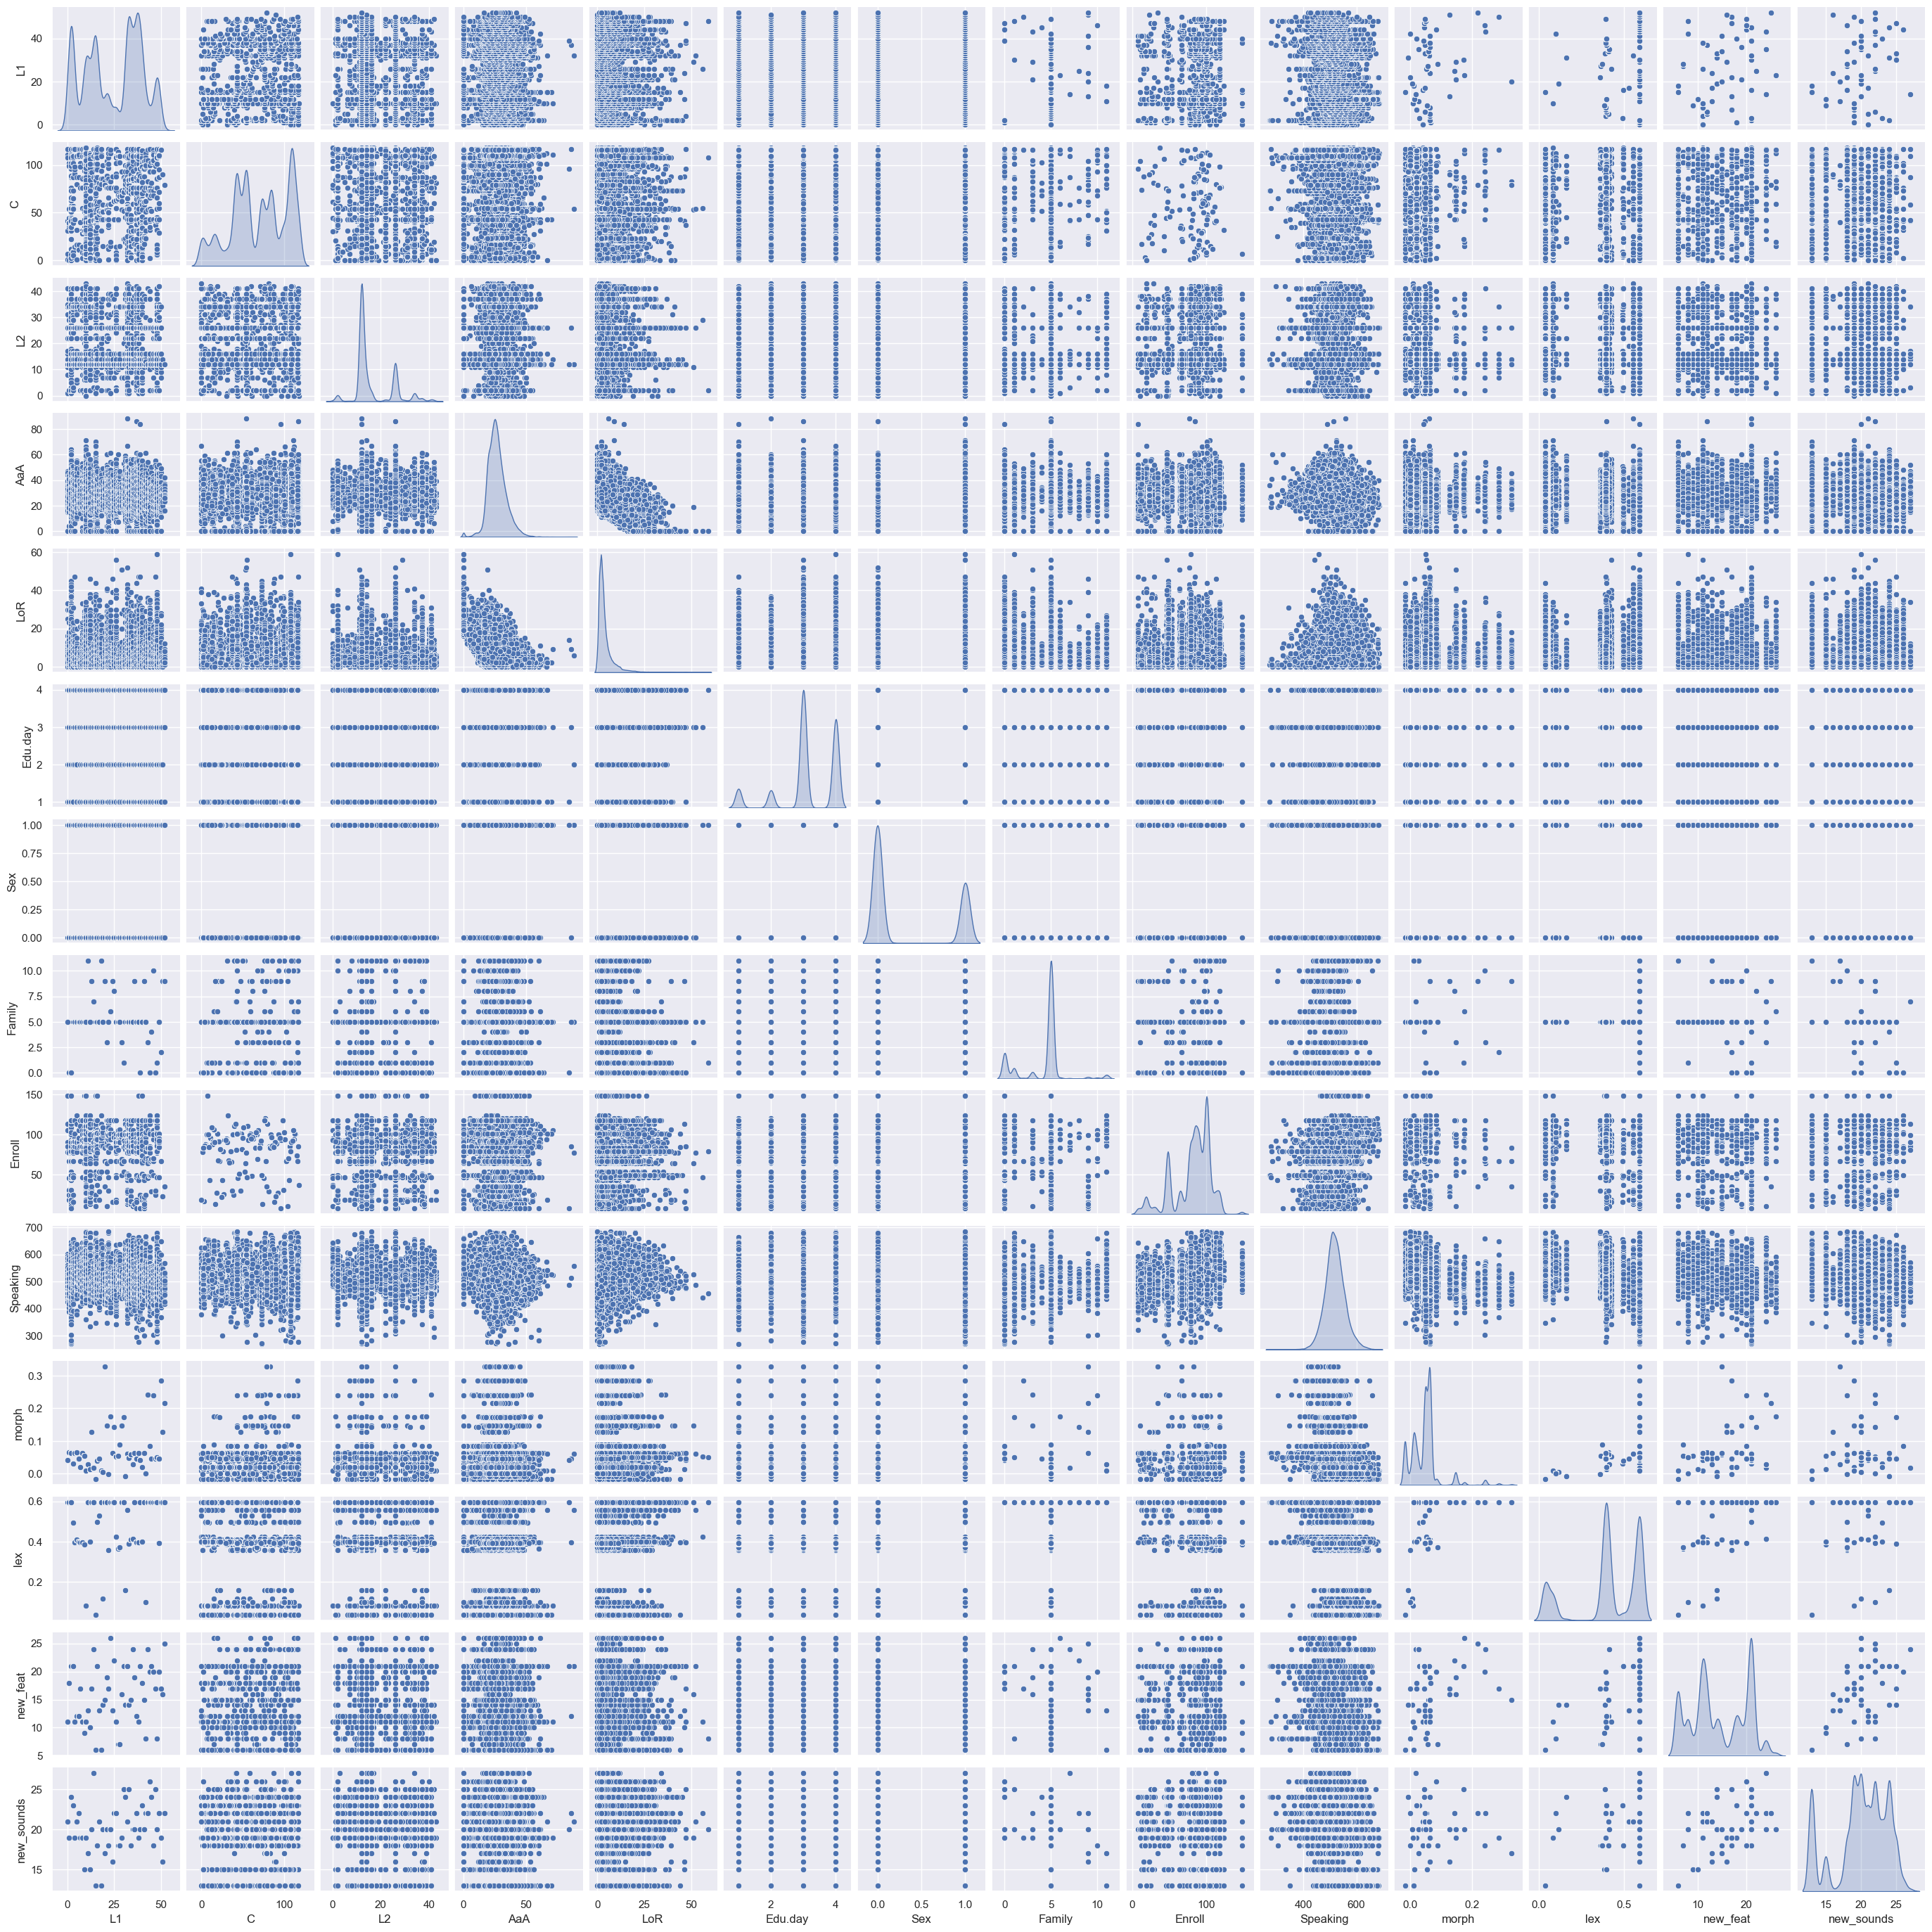

In [35]:
sns.set()
sns.pairplot(dataframe, height = 2, kind ='scatter', diag_kind='kde')
plt.show()

Здесь мы можем видеть некую линейную зависимость:
- `new_feat` и `new_sounds`
- продолжительность проживания и возраст приезда

Построим тепловую карту корреляции, использую корреляцию Спирмена, так как мы не смогли удостовериться в нормальности распределений.

<Axes: >

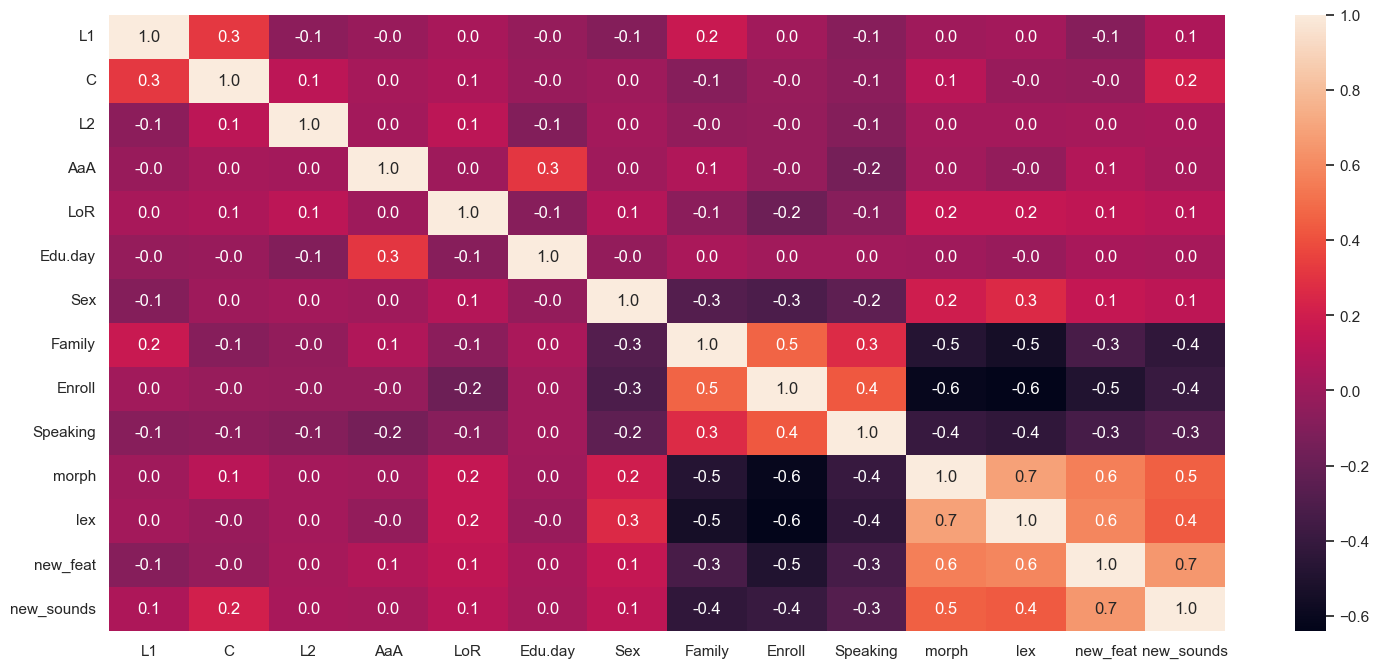

In [36]:
corr = dataframe.corr(method="spearman")
f, ax = plt.subplots(figsize=(18,8))
sns.heatmap(corr, annot=True, fmt='.1f')

Наблюдаем умеренную прямую корреляцию у следующих пар:

- `morph` и `lex`
- `new_feat` и `new_sounds`
- `lex` и `new_feat`
- `lex` и `new_sounds`

Кроме того, можно сделать следующие выводы:

- Продолжительность обучения на языковых курсах зависит от языковой семьи родного языка участника
- Большая продолжительность пребывания на курсах приводит к лучшему результату в тесте на разговорную речь, однако уменьшает баллы за другие тесты, хоть там коэффициент корреляции и слабее. Поэтому рассмотрим этот момент подробнее
- Все оценки знания языки связаны друг с другом. Это легко объясняется тем, что для всестороннего полноценного знания языка нельзя знать письменную речь, но не говорить на этом языке. Наиболее сильная корреляция наблюдается между морфологическими и лексическими оценками
- Оценка усвоения новых звуков, слов и грамматических конструкция прямо связано с оценкой произношения

### Диаграммы рассеяния и регрессионные прямые от продолжительности обучения на курсах

<Axes: xlabel='Enroll', ylabel='new_sounds'>

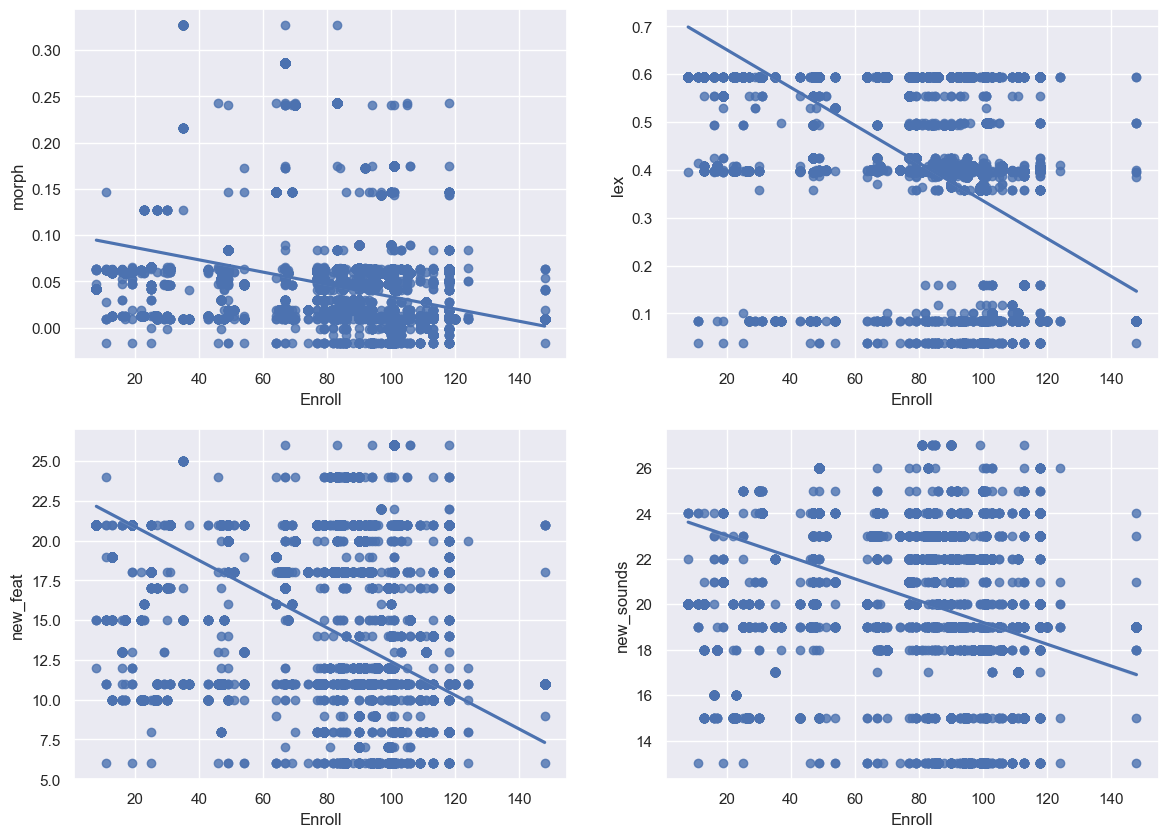

In [37]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(14,10))
sns.regplot(x='Enroll', y = 'morph', data = dataframe, fit_reg=True, ax=ax1)
sns.regplot(x='Enroll', y = 'lex', data = dataframe, fit_reg=True, ax=ax2)
sns.regplot(x='Enroll', y = 'new_feat', data = dataframe, fit_reg=True, ax=ax3)
sns.regplot(x='Enroll', y = 'new_sounds', data = dataframe, fit_reg=True, ax=ax4)

Здесь, кажется, нет никакой реальной зависимости.

### Еще всякие графики с группировкой по признакам

In [38]:
import plotly.express as px

In [39]:
df = pd.read_csv('stex.csv', encoding='latin1')

In [40]:
language_counts = df['L1'].value_counts()
language_counts = language_counts.reset_index()
language_counts.columns = ['Language', 'Count']
language_counts = language_counts.sort_values('Count', ascending=False)

In [41]:
fig = px.bar(language_counts, x='Language', y='Count', labels={'Count': 'Count'}, title='First Language Counts - All Languages')
fig.update_traces(marker_color='steelblue')
fig.show()

### Выявление наиболее важных факторов

Построим регрессор на основе случайного леса и выделим те признаки, которые наиболее сильно повлияли на оценку по разговорному тесту.

In [42]:
from sklearn.ensemble import RandomForestRegressor

In [43]:
df.dropna(inplace=True)
print(df.count())
df.head(10)

L1            47232
C             47232
L1L2          47232
L2            47232
AaA           47232
LoR           47232
Edu.day       47232
Sex           47232
Family        47232
ISO639.3      47232
Enroll        47232
Speaking      47232
morph         47232
lex           47232
new_feat      47232
new_sounds    47232
dtype: int64


,L1,C,L1L2,L2,AaA,LoR,Edu.day,Sex,Family,ISO639.3,Enroll,Speaking,morph,lex,new_feat,new_sounds
301,Albanian,Albania,AlbanianEnglish,English,17,3,3.0,Male,Indo-European,sqi,78,515,0.0412,0.595079,11.0,21.0
302,Albanian,Albania,AlbanianGerman,German,23,1,4.0,Female,Indo-European,sqi,78,521,0.0412,0.595079,11.0,21.0
303,Albanian,Yugoslavia,AlbanianCroatian,Croatian,22,3,3.0,Female,Indo-European,sqi,85,519,0.0412,0.595079,11.0,21.0
304,Albanian,Albania,AlbanianEnglish,English,30,3,4.0,Female,Indo-European,sqi,78,528,0.0412,0.595079,11.0,21.0
305,Albanian,Albania,AlbanianGreek,Greek,17,1,1.0,Female,Indo-European,sqi,78,481,0.0412,0.595079,11.0,21.0
306,Albanian,Yugoslavia,AlbanianFrench,French,26,4,2.0,Female,Indo-European,sqi,85,515,0.0412,0.595079,11.0,21.0
307,Albanian,Yugoslavia,AlbanianEnglish,English,20,6,3.0,Male,Indo-European,sqi,85,581,0.0412,0.595079,11.0,21.0
308,Albanian,Yugoslavia,AlbanianCroatian,Croatian,22,4,3.0,Male,Indo-European,sqi,85,471,0.0412,0.595079,11.0,21.0
309,Albanian,Yugoslavia,AlbanianEnglish,English,22,2,3.0,Male,Indo-European,sqi,85,601,0.0412,0.595079,11.0,21.0
310,Albanian,Yugoslavia,AlbanianEnglish,English,23,4,4.0,Female,Indo-European,sqi,85,486,0.0412,0.595079,11.0,21.0


#### Предобработка

In [44]:
df_encoded = pd.get_dummies(df)

# разделим датафрейм на обучающую выборку и целевую переменную (целевая - оценка за Speaking тест)
X = df_encoded.drop('Speaking', axis=1)
y = df_encoded['Speaking']

# Label encode the target variable if needed
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

#### Обучение случайного леса

In [45]:
rf = RandomForestRegressor()
rf.fit(X, y)

RandomForestRegressor()

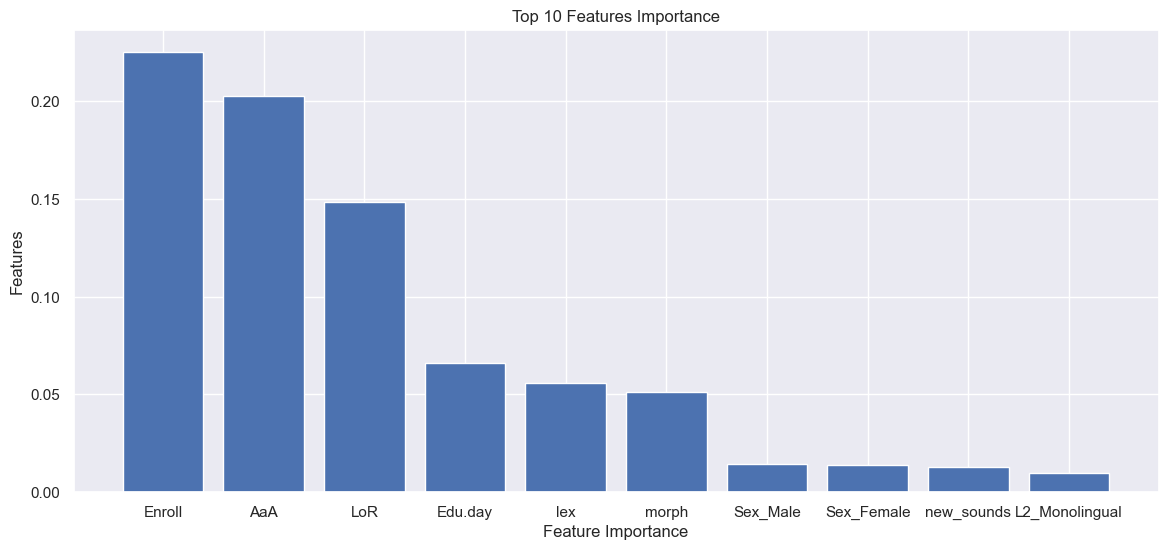

In [52]:
# Get feature importances and corresponding feature names
importances = rf.feature_importances_
feature_names = X.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Select top 10 features
top_features = feature_names[indices][:10]
top_importances = importances[indices][:10]

# Create a bar plot for feature importances
plt.figure(figsize=(14, 6))
plt.xticks(range(10), top_features)
plt.bar(range(10), top_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Top 10 Features Importance')
plt.show()